In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('model_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   active_period          30580 non-null  int64  
 1   mint_count             30580 non-null  int64  
 2   burn_count             30580 non-null  int64  
 3   swap_count             30580 non-null  int64  
 4   mint_mean_period       30580 non-null  int64  
 5   burn_mean_period       30580 non-null  int64  
 6   swap_mean_period       30580 non-null  int64  
 7   token_burn_ratio       30580 non-null  float64
 8   swapIn                 30580 non-null  int64  
 9   swapOut                30580 non-null  int64  
 10  lp_avg                 30580 non-null  float64
 11  lp_std                 30580 non-null  float64
 12  creator_holding_ratio  30580 non-null  float64
 13  lp_lock_ratio          30580 non-null  float64
 14  is_MEV                 30580 non-null  bool   
 15  is

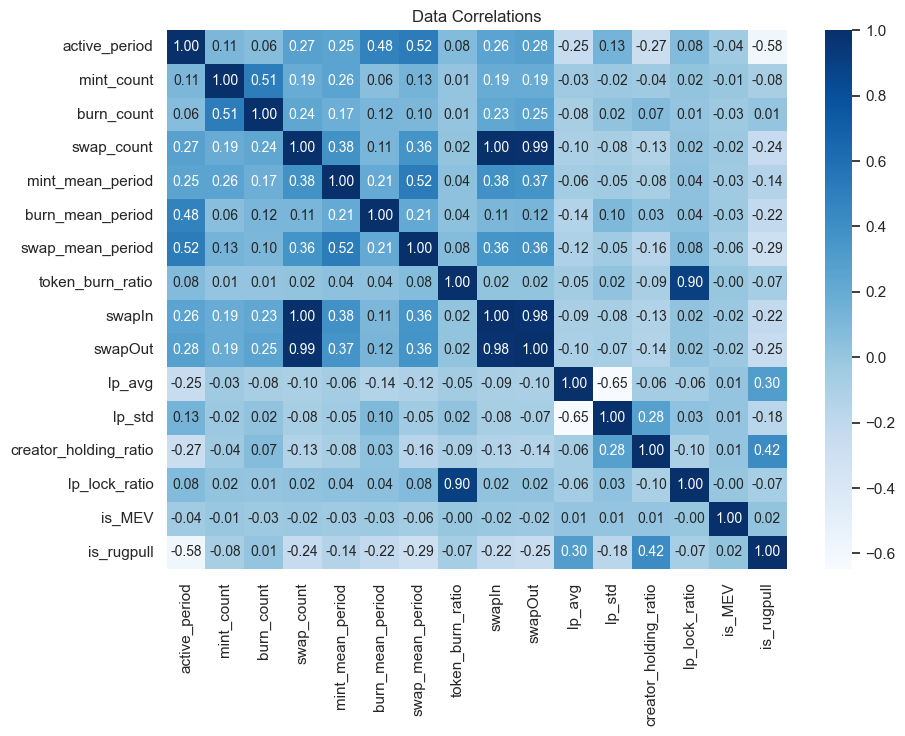

In [6]:
correlation=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, fmt='.2f', annot_kws={'size': 10}, cmap='Blues')
plt.title("Data Correlations")
plt.show(block=False)

As you can see we got several strong correlation which we can use like active_period, swap_count, burn_mean_period, swap_mean_period, swapIn, swapOut, lp_avg, creater_holding_ratio

In [7]:
X = df[['active_period', 'swap_count', 'burn_mean_period', 'swap_mean_period', 'swapIn', 'swapOut', 'lp_avg', 'creator_holding_ratio']].astype(float)
y = df.is_rugpull

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   active_period          30580 non-null  float64
 1   swap_count             30580 non-null  float64
 2   burn_mean_period       30580 non-null  float64
 3   swap_mean_period       30580 non-null  float64
 4   swapIn                 30580 non-null  float64
 5   swapOut                30580 non-null  float64
 6   lp_avg                 30580 non-null  float64
 7   creator_holding_ratio  30580 non-null  float64
dtypes: float64(8)
memory usage: 1.9 MB


In [84]:
X.to_csv("testing.csv")

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=15)


In [10]:
import xgboost as xgb

XGB = xgb.XGBClassifier()

XGB.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:

print(X.shape, X_train.shape, X_test.shape)

(30580, 8) (22935, 8) (7645, 8)


In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [13]:
XGB_predict = XGB.predict(X_train)
XGB_conf_matrix = confusion_matrix(y_train, XGB_predict)
XGB_acc_score = accuracy_score(y_train, XGB_predict)
print('Accuracy on the training data\n')
print("confusion matrix")
print(XGB_conf_matrix)
print("\n")
print("Accuracy of XGBoost on training data:",XGB_acc_score*100,'\n')
print(classification_report(y_train,XGB_predict))

Accuracy on the training data

confusion matrix
[[ 5166   126]
 [   55 17588]]


Accuracy of XGBoost on training data: 99.2108131676477 

              precision    recall  f1-score   support

       False       0.99      0.98      0.98      5292
        True       0.99      1.00      0.99     17643

    accuracy                           0.99     22935
   macro avg       0.99      0.99      0.99     22935
weighted avg       0.99      0.99      0.99     22935



In [14]:

# accuracy on the testing data
XGB_predict = XGB.predict(X_test)
XGB_conf_matrix = confusion_matrix(y_test, XGB_predict)
XGB_acc_score = accuracy_score(y_test, XGB_predict)
print('Accuracy on the testing data\n')
print("confusion matrix")
print(XGB_conf_matrix)
print("\n")
print("Accuracy of XGB on testing data:",XGB_acc_score*100,'\n')
print(classification_report(y_test,XGB_predict))

Accuracy on the testing data

confusion matrix
[[1615  149]
 [ 121 5760]]


Accuracy of XGB on testing data: 96.46827992151734 

              precision    recall  f1-score   support

       False       0.93      0.92      0.92      1764
        True       0.97      0.98      0.98      5881

    accuracy                           0.96      7645
   macro avg       0.95      0.95      0.95      7645
weighted avg       0.96      0.96      0.96      7645



In [15]:
pred = [[3955584,	218	,108420	,19527	,118,	100	,3.125000,	80.13]]

In [34]:
X_test.head()

,active_period,swap_count,burn_mean_period,swap_mean_period,swapIn,swapOut,lp_avg,creator_holding_ratio
28658,3955584.0,218.0,108420.0,19527.0,118.0,100.0,3.125000,80.13
6164,40488.0,224.0,0.0,1963.0,135.0,89.0,1.666667,0.00
2713,3552.0,115.0,0.0,1341.0,85.0,30.0,100.000000,0.00
5330,3516.0,15.0,3516.0,3385.0,9.0,6.0,12.500000,94.83
18975,72.0,1.0,0.0,72.0,0.0,1.0,50.000000,0.00


In [16]:
y_test.head()

28658     True
6164     False
2713      True
5330      True
18975     True
Name: is_rugpull, dtype: bool

In [18]:
from giza.zkcook import mcr

In [19]:
model, transformer = mcr(model = XGB,
                         X_train = X_train,
                         y_train = y_train,
                         X_eval = X_test,
                         y_eval = y_test,
                         eval_metric = 'logloss',
                         transform_features = True)

Adjusting max_depth to new range: [3, 6]
Adjusting gamma to new range: [0, 5]


In [20]:
X_test_transformed = transformer.transform(X_test)
# y_pred = model.predict(X_test_transformed)
# roc_auc = roc_auc_score(y_test, y_pred)
# print("ROC_AUC = {}".format(roc_auc))



XGB_predict = model.predict(X_test_transformed)
XGB_conf_matrix = confusion_matrix(y_test, XGB_predict)
XGB_acc_score = accuracy_score(y_test, XGB_predict)
print('Accuracy on the testing data\n')
print("confusion matrix")
print(XGB_conf_matrix)
print("\n")
print("Accuracy of XGB on testing data:",XGB_acc_score*100,'\n')
print(classification_report(y_test,XGB_predict))

Accuracy on the testing data

confusion matrix
[[1562  202]
 [ 125 5756]]


Accuracy of XGB on testing data: 95.72269457161543 

              precision    recall  f1-score   support

       False       0.93      0.89      0.91      1764
        True       0.97      0.98      0.97      5881

    accuracy                           0.96      7645
   macro avg       0.95      0.93      0.94      7645
weighted avg       0.96      0.96      0.96      7645



In [21]:
pred = np.array([[3955584,	218	,108420	,19527	,118,	100	,3.125000,	80.13]])
pred_transform = transformer.transform(pred)
model.predict(pred_transform)

array([1])

In [76]:
pred

array([[3.955584e+06, 2.180000e+02, 1.084200e+05, 1.952700e+04,
        1.180000e+02, 1.000000e+02, 3.125000e+00, 8.013000e+01]])

In [81]:
from pprint import pprint

In [82]:
pprint(pred_transform)

array([[1.000000e+02, 3.125000e+00, 1.084200e+05, 3.955584e+06,
        8.013000e+01, 1.180000e+02]])


if the predicted value is zero then it means that its not a rugpull and if its one then its a rugpull

### Saving the model into json format

In [48]:
from giza.zkcook import serialize_model
serialize_model(model, "gg.json")

### Transpile your model to Orion Cairo

We will use Giza-CLI to transpile our saved model to Orion Cairo.

In [49]:
! giza transpile gg.json --output-path gg

[giza][2024-06-10 22:37:22.031] No model id provided, checking if model exists ✅
[giza][2024-06-10 22:37:22.035] Model name is: gg

⠋ Retrieving Model...
⠙ Retrieving Model...
⠹ Retrieving Model...
⠼ Retrieving Model...
⠴ Retrieving Model...
⠦ Retrieving Model...
⠇ Retrieving Model...
⠏ Retrieving Model...
⠋ Retrieving Model...
⠹ Retrieving Model...
⠸ Retrieving Model...
⠼ Retrieving Model...
⠦ Retrieving Model...
⠧ Retrieving Model...
[giza][2024-06-10 22:37:23.542] Model Created with id -> 795! ✅
⠧ Retrieving Model...
⠇ Creating Version...
⠇ Creating Version...
⠋ Creating Version...
⠙ Creating Version...
⠸ Creating Version...
⠼ Creating Version...
⠴ Creating Version...
⠧ Creating Version...
⠇ Creating Version...
[giza][2024-06-10 22:37:24.368] Version Created with id -> 1! ✅
⠇ Creating Version...
[giza][2024-06-10 22:37:24.369] Sending model for transpilation ✅ 
⠇ Creating Version...




































⠧ Transpiling Model...
⠇ Transpiling Model...
⠋ Transpiling Model

Model ID: 773
Version: 1

In [56]:
!giza endpoints delete --endpoint-id 342

[giza][2024-06-10 22:45:55.548] Deleting endpoint 342 ✅ 
[giza][2024-06-10 22:45:56.538] Endpoint 342 deleted ✅ 


In [57]:
! giza endpoints deploy --model-id 795 --version-id 1

▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▰▱▱▱ Creating endpoint!
▰▰▰▰▰▰▰ Creating endpoint!
▰▰▱▱▱▱▱ Creating endpoint!
▰▰▰▰▰▰▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▰▱▱▱ Creating endpoint!
▰▰▰▰▰▰▰ Creating endpoint!
▰▰▰▱▱▱▱ Creating endpoint!
▰▰▰▰▰▰▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▰▰▱▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▱▱▱▱ Creating endpoint!
▰▰▰▰▰▰▱ Creating endpoint!
▰▰▱▱▱▱▱ Creating endpoint!
▰▰▰▰▰▱▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▰▱▱▱ Creating endpoint!
▰▰▰▰▰▰▰ Creating endpoint!
▰▰▱▱▱▱▱ Creating endpoint!
▰▰▰▰▰▱▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▰▱▱▱ Creating endpoint!
▰▰▰▰▰▰▰ Creating endpoint!
▰▰▱▱▱▱▱ Creating endpoint!
▰▰▰▰▰▰▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▰▱▱▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▱▱▱▱ Creating endpoint!
▰▰▰▰▰▰▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▰▰▱▱ Creating endpoint!
▰▱▱▱▱▱▱ Creating endpoint!
▰▰▰▱▱▱▱ Creating endpoint!
▰▰▰▰▰▰▱ Creating endpoint!
▰

In [77]:
X_train_transformed = transformer.transform(X_train)

In [47]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import math

from giza.agents.model import GizaModel     ## converts the data you send into int


MODEL_ID = 795  # Update with your model ID
VERSION_ID = 1  # Update with your version ID

def prediction(input, model_id, version_id):
    model = GizaModel(id=model_id, version=version_id)

    (result, proof_id) = model.predict(
        input_feed={"input": input}, verifiable=True,dry_run=True, model_category="XGB"
    )

    return result, proof_id


def execution():
    # The input data type should match the model's expected input
    input = np.array([[40488.0	,224.0,	0.0	,1963.0	,135.0	,89.0,	1.666667	,0.00]])
    # input = transformer.transform(input)
    input = input.flatten()




  
    (result, proof_id) = prediction(input, MODEL_ID, VERSION_ID)

    # print(f"Predicted value for input {input.flatten()[0]} is {result}")
    # result1 = np.array([[result]]).astype(np.float64)
    print("Result: ", result)
    print("Request id: ", proof_id)

    return result, proof_id


if __name__ == "__main__":
    
   
    result, proof_id = execution()
    final_score = 1 / (1 + math.exp(-result))
    print(final_score)  #The result you will get is the probability of class 1.

🚀 Starting deserialization process...
✅ Deserialization completed! 🎉
Result:  -0.39732
Request id:  4ab3d90ab91f4f8a90164bf3f20b180e
0.40195640864583043


In [78]:
pred = np.array([[40488.0	,224.0,	0.0	,1963.0	,135.0	,89.0,	1.666667	,0.00]]).astype(np.int64)
pred_transform = transformer.transform(pred)

First index denotes class 0 probability(no rugpull) and second index denotes class 1 probability

In [79]:
XGB.predict_proba(pred)

array([[0.7368475 , 0.26315248]], dtype=float32)

In [80]:
model.predict_proba(pred_transform)

array([[0.7663536 , 0.23364638]], dtype=float32)

Endpoint ID: 341

## TEMP

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   active_period          30580 non-null  int64  
 1   swap_count             30580 non-null  int64  
 2   burn_mean_period       30580 non-null  int64  
 3   swap_mean_period       30580 non-null  int64  
 4   swapIn                 30580 non-null  int64  
 5   swapOut                30580 non-null  int64  
 6   lp_avg                 30580 non-null  float64
 7   creator_holding_ratio  30580 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.9 MB


In [58]:
X_new = X.astype(float)

In [59]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   active_period          30580 non-null  float64
 1   swap_count             30580 non-null  float64
 2   burn_mean_period       30580 non-null  float64
 3   swap_mean_period       30580 non-null  float64
 4   swapIn                 30580 non-null  float64
 5   swapOut                30580 non-null  float64
 6   lp_avg                 30580 non-null  float64
 7   creator_holding_ratio  30580 non-null  float64
dtypes: float64(8)
memory usage: 1.9 MB


In [ ]:
X_new = X.rename(columns = {"active_period":"f0", "swap_count": "f1", "burn_mean_period": "f2", "swap_mean_period": "f3", "swapIn": "f4", "swapOut": "f5", "lp_avg": "f6", "creater_holding_ratio": "f7"})

In [ ]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30580 entries, 0 to 30579
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   f0                     30580 non-null  int64  
 1   f1                     30580 non-null  int64  
 2   f2                     30580 non-null  int64  
 3   f3                     30580 non-null  int64  
 4   f4                     30580 non-null  int64  
 5   f5                     30580 non-null  int64  
 6   f6                     30580 non-null  float64
 7   creator_holding_ratio  30580 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.9 MB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22935 entries, 352 to 14843
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   f0                     22935 non-null  int64  
 1   f1                     22935 non-null  int64  
 2   f2                     22935 non-null  int64  
 3   f3                     22935 non-null  int64  
 4   f4                     22935 non-null  int64  
 5   f5                     22935 non-null  int64  
 6   f6                     22935 non-null  float64
 7   creator_holding_ratio  22935 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.6 MB


In [ ]:
X_test.head()

,f0,f1,f2,f3,f4,f5,f6,creator_holding_ratio
28658,3955584,218,108420,19527,118,100,3.125000,80.13
6164,40488,224,0,1963,135,89,1.666667,0.00
2713,3552,115,0,1341,85,30,100.000000,0.00
5330,3516,15,3516,3385,9,6,12.500000,94.83
18975,72,1,0,72,0,1,50.000000,0.00


In [ ]:
import onnxmltools
from onnxmltools.convert import convert_xgboost
from onnxmltools.convert.common.data_types import FloatTensorType

In [ ]:
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_xgboost(XGB, initial_types=initial_type)       #Convert model to ONNX

RuntimeError: Unable to interpret 'creator_holding_ratio', feature names should follow pattern 'f%d'.

In [83]:
!giza endpoints list

[giza][2024-06-10 23:57:41.598] Listing endpoints ✅ 
[
  {
    "id": 228,
    "status": "COMPLETED",
    "uri": "https://endpoint-zenith-651-1-08dccc27-7i3yxzspbq-ew.a.run.app",
    "size": "S",
    "service_name": "endpoint-zenith-651-1-08dccc27",
    "model_id": 651,
    "version_id": 1,
    "is_active": true
  },
  {
    "id": 230,
    "status": "COMPLETED",
    "uri": "https://endpoint-zenith-651-2-5cea366c-7i3yxzspbq-ew.a.run.app",
    "size": "S",
    "service_name": "endpoint-zenith-651-2-5cea366c",
    "model_id": 651,
    "version_id": 2,
    "is_active": true
  },
  {
    "id": 341,
    "status": "COMPLETED",
    "uri": "https://endpoint-zenith-773-1-d24306d3-7i3yxzspbq-ew.a.run.app",
    "size": "S",
    "service_name": "endpoint-zenith-773-1-d24306d3",
    "model_id": 773,
    "version_id": 1,
    "is_active": true
  },
  {
    "id": 342,
    "status": "COMPLETED",
    "uri": "https://endpoint-zenith-774-1-86b8cf08-7i3yxzspbq-ew.a.run.app",
    "size": "S",
    "service_nam

In [84]:
!giza endpoints get --endpoint-id 341

[giza][2024-06-11 00:10:11.235] Getting endpoint 341 ✅ 
{
  "id": 341,
  "status": "COMPLETED",
  "uri": "https://endpoint-zenith-773-1-d24306d3-7i3yxzspbq-ew.a.run.app",
  "size": "S",
  "service_name": "endpoint-zenith-773-1-d24306d3",
  "model_id": 773,
  "version_id": 1,
  "is_active": true
}
